In [70]:
# Import Modules
import math
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from warnings import catch_warnings
from warnings import simplefilter
import scipy.stats as stats

In [71]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter('ignore')
        return model.predict(X, return_std=True)

In [72]:
# Expected improvement acquisition function
def acquisition(X, Xpred, model):
    # calculate the best surrgate score found so far
    yhat, _ = surrogate(model, X)
    best = max(yhat)

    # calculate mean and stdev via surrogate function
    mu, std = surrogate(model, Xpred)
    # calculate the expected improvement (EI)
    # Clip std to avoid division by zero
    std = np.clip(std, 1e-9, None) # Replace None with a suitable upper bound if needed
    z = (mu - best) / std
    ei = (mu - best) * stats.norm.cdf(z) + std * stats.norm.pdf(z)
    return ei

In [73]:
# optimize the acquisition function
def opt_acquisition(X, y, model):
    # random search, generate random samples
    Xsamples = np.random.random(100)
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    
    # calculate the acquisition function for each sample
    scores = acquisition(X, Xsamples, model)
    # locate the index of the largest scores
    ix = np.argmax(scores)
    return Xsamples[ix,0]

In [74]:
# plot real observation vs surrogate function
def plot(X, y, model):
    # Split inputs
    Xe1 = [X[i][0] for i in range(len(X))]
    Xe2 = [X[i][1] for i in range(len(X))]
    Xe3 = [X[i][2] for i in range(len(X))]
    ye1 = [y[i][0] for i in range(len(y))]
    ye2 = [y[i][1] for i in range(len(y))]

    # scatter plot of imputs
    fig, axes = plt.subplots(2,3)
    axes[0,0].scatter(Xe1, ye1)
    axes[0,1].scatter(Xe2, ye1)
    axes[0,2].scatter(Xe3, ye1)
    axes[1,0].scatter(Xe1, ye2)
    axes[1,1].scatter(Xe2, ye2)
    axes[1,2].scatter(Xe3, ye2)

    # line plot of surragte function acorss domain
    Xp1 = np.linspace(10,20,1000)
    Xp2 = np.linspace(0,2,1000)
    Xp3 = np.linspace(-10,10,1000)
    
    yp, _ = surrogate(model, Xpred)
    plt.plot(Xpred, ypred)
    # show the plot
    plt.show()

In [78]:
Xp1 = np.linspace(10,20,1000)
Xp2 = np.linspace(0,2,1000)
Xp3 = np.linspace(-10,10,1000)

Xp = list(zip(Xp1,Xp2,Xp3))
Xp

[(10.0, 0.0, -10.0),
 (10.01001001001001, 0.002002002002002002, -9.97997997997998),
 (10.02002002002002, 0.004004004004004004, -9.95995995995996),
 (10.03003003003003, 0.006006006006006006, -9.93993993993994),
 (10.04004004004004, 0.008008008008008008, -9.91991991991992),
 (10.05005005005005, 0.01001001001001001, -9.8998998998999),
 (10.06006006006006, 0.012012012012012012, -9.87987987987988),
 (10.07007007007007, 0.014014014014014014, -9.85985985985986),
 (10.08008008008008, 0.016016016016016016, -9.83983983983984),
 (10.09009009009009, 0.018018018018018018, -9.81981981981982),
 (10.1001001001001, 0.02002002002002002, -9.7997997997998),
 (10.11011011011011, 0.022022022022022022, -9.77977977977978),
 (10.12012012012012, 0.024024024024024024, -9.75975975975976),
 (10.13013013013013, 0.026026026026026026, -9.73973973973974),
 (10.14014014014014, 0.028028028028028028, -9.71971971971972),
 (10.15015015015015, 0.03003003003003003, -9.6996996996997),
 (10.16016016016016, 0.03203203203203203,

UnboundLocalError: local variable 'Xpred' referenced before assignment

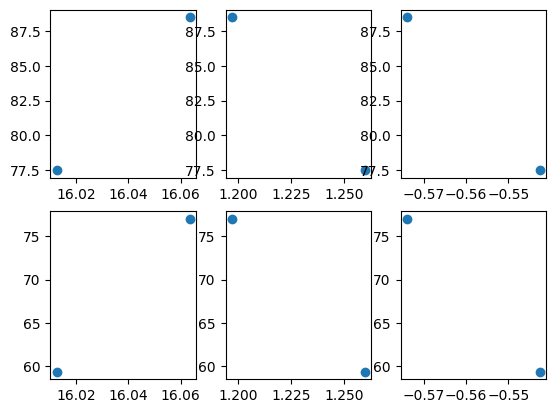

In [75]:
# Sample Data
X = np.asarray([[16.0635,1.197,-0.5739],[16.0127,1.26,-0.5425]])
y = np.asarray([[88.5,77],[77.5,59.4]])

X1 = [X[i][0] for i in range(len(X))]
X2 = [X[i][1] for i in range(len(X))]
X3 = [X[i][2] for i in range(len(X))]
y1 = [y[i][0] for i in range(len(y))]
y2 = [y[i][1] for i in range(len(y))]

# define the model
model = GaussianProcessRegressor()
model.fit(X,y)
y_predict= model.predict(X)

plot(X, y, model)

In [ ]:
# select the next point ot sample
x = opt_acquisition(X, y, model)

# calculate the actual result
actual = objective(x)

# summarize the finding
est, _ = surrogate(model, [[x]])
print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))


>x=0.888, f()=0.729468, actual=0.713
